In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Data/202107-citibike-tripdata.csv')
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['started_at'] = pd.to_datetime(df['started_at'])
df['duration_mins'] = (df['ended_at'] - df['started_at']).dt.seconds.div(60)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


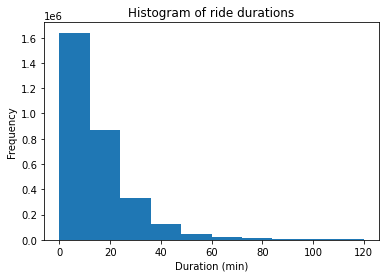

In [6]:
cutoff=120
bins=10
plt.figure()
plt.title('Histogram of ride durations')
plt.ylabel('Frequency')
plt.xlabel('Duration (min)')
plt.hist(df[df['duration_mins'] < cutoff]['duration_mins'], bins=bins)
plt.savefig('Figures/warmup1')

In [7]:
print("Expected duration:", df['duration_mins'].mean())
print("Duration variance:", df['duration_mins'].var())
print("Probability of ride > 20 mins:", len(df[df['duration_mins'] > 20].index) / len(df.index))

Expected duration: 16.884468517208443
Duration variance: 1055.8471518401905
Probability of ride > 20 mins: 0.24976098519810266


In [8]:
temp_df = df[df['member_casual'] == 'member']
print("Probability of ride > 20 mins given member:", len(temp_df[temp_df['duration_mins'] > 20].index) / len(temp_df.index))

Probability of ride > 20 mins given member: 0.19422869031097786


In [9]:
temp_df = df[df['duration_mins'] > 25]
print("Probability of being member given > 25 mins ride:", len(temp_df[temp_df['member_casual'] == 'member'].index) / len(temp_df.index))

Probability of being member given > 25 mins ride: 0.4828903995346324


In [17]:
df_reduced = df[['ride_id', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id']]
df_reduced.head()

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id
0,247BA541A9674BF3,2021-07-09 16:05:36,2021-07-09 16:18:09,5 Ave & E 93 St,7372.10,Frederick Douglass Blvd & W 117 St,7688.12
1,125C9ACA270A5E2D,2021-07-11 16:23:35,2021-07-11 16:29:07,5 Ave & E 93 St,7372.10,E 88 St & Park Ave,7293.10
2,2E26264BCC15BA05,2021-07-23 06:22:40,2021-07-23 06:36:13,34 St & 38 Ave,6453.02,McGuinness Blvd & Eagle St,5977.01
3,A56D23A088563424,2021-07-05 16:08:10,2021-07-05 16:36:00,Lenox Ave & W 111 St,7602.05,5 Ave & E 78 St,7161.08
4,1451F4BB884C5335,2021-07-26 12:28:57,2021-07-26 12:30:21,6 Ave & Broome St,5610.09,6 Ave & Canal St,5500.07


In [27]:
df_reduced.dtypes

ride_id                       object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id             float64
end_station_name              object
end_station_id                object
dtype: object

In [35]:
df_reduced[(df_reduced['start_station_id'] == 6912.01 or 
           df_reduced['start_station_id'] == 5980.07)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [24]:
len(pd.unique(df_reduced['start_station_id']))

1488

In [25]:
df_reduced['start_station_id'].value_counts()

6912.01    14254
5980.07    13600
6140.05    13488
5329.03    13311
6173.08    12753
           ...  
8539.02       24
7983.04       22
6474.02       15
8711.02        8
7226.03        8
Name: start_station_id, Length: 1487, dtype: int64

In [26]:
df_reduced['end_station_id'].value_counts()

6912.01    14264
6140.05    13072
5980.07    12868
5184.08    12020
6173.08    11334
           ...  
5137.11        1
6887.03        1
JC051          1
JC024          1
5137.13        1
Name: end_station_id, Length: 2595, dtype: int64